In [132]:
pip install librosa


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [133]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Analysing the Given Annotations File..

In [135]:
ANNOTATION_PATH = 'Heart Data_Annotation.xlsx' 

In [136]:
annotations = pd.read_excel(ANNOTATION_PATH) # Read the Excel file..
print("Given data has the following columns:", annotations.columns)

Given data has the following columns: Index(['Patient ID', 'Age ', 'Gender', 'Location', 'Finding (Steth)',
       'Grade (steth)', 'Finding (Echo)', 'Grade (echo)', 'Unnamed: 8',
       'e PAP', 'Unnamed: 10', 'Unnamed: 11', 'Findings:- N: Normal, '],
      dtype='object')


## Findings:- N: Normal, (This is the Last Column that defines the given terms )					
AV: Aortic valve, TR: tricuspid valve regurgitation, AR: aortic valve regurgitation, MR : Mitral valve regurgitation. ME: Metallic Prosthetic  					
Grades: trace=0, 1,2,3, 4.					
Location: A:aortic, P: pulmonary, T: tricuspid, M: Mitral. 					
				

In [137]:
# we don't need the unnamed columns and last column, so drop them..
annotations = annotations.drop(columns=[
    col for col in annotations.columns if "Unnamed" in col or "Findings" in col   
], errors='ignore')


In [138]:
annotations = annotations.rename(columns={'Patient ID':'Patient_ID','Age ': 'Age'})
annotations.shape

(416, 9)

In [139]:
annotations.head()

,Patient_ID,Age,Gender,Location,Finding (Steth),Grade (steth),Finding (Echo),Grade (echo),e PAP
0,1.0,40.0,F,A,N,NaN,N,NaN,NaN
1,NaN,NaN,NaN,P,N,NaN,N,NaN,NaN
2,NaN,NaN,NaN,T,N,NaN,TR,0.0,NaN
3,NaN,NaN,NaN,M,N,NaN,MR,1.0,NaN
4,2.0,74.0,F,A,N,NaN,AR,0.0,NaN


In [140]:
annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient_ID       104 non-null    float64
 1   Age              104 non-null    float64
 2   Gender           104 non-null    object 
 3   Location         416 non-null    object 
 4   Finding (Steth)  416 non-null    object 
 5   Grade (steth)    3 non-null      object 
 6   Finding (Echo)   400 non-null    object 
 7   Grade (echo)     167 non-null    float64
 8   e PAP            29 non-null     float64
dtypes: float64(4), object(5)
memory usage: 29.4+ KB


In [141]:
# Filling the missing values for patient info...
annotations[['Patient_ID', 'Age', 'Gender']] = annotations[['Patient_ID', 'Age', 'Gender']].ffill()

# Pivot so that each patient becomes one row
my_df = annotations.pivot_table(
    index=['Patient_ID', 'Age', 'Gender'],
    columns='Location',
    values=['Finding (Steth)', 'Grade (steth)', 'Finding (Echo)', 'Grade (echo)', 'e PAP'],
    aggfunc='first'  # In case of duplicates
)

# Flatten multi-level column names
my_df.columns = [f"{col[0]}_{col[1]}" for col in my_df.columns]
my_df = my_df.reset_index()

# Replace NaNs (some patients may have missing positions)
my_df = my_df.fillna(0)


my_df.head()


,Patient_ID,Age,Gender,Finding (Echo)_A,Finding (Echo)_M,Finding (Echo)_P,Finding (Echo)_T,Finding (Steth)_A,Finding (Steth)_M,Finding (Steth)_P,Finding (Steth)_T,Grade (echo)_A,Grade (echo)_M,Grade (echo)_T,Grade (steth)_A,e PAP_A,e PAP_M,e PAP_T
0,1.0,40.0,F,N,MR,N,TR,N,N,N,N,0.0,1.0,0.0,0,0.0,0.0,0.0
1,2.0,74.0,F,AR,MR,N,TR,N,N,N,N,0.0,1.0,1.0,0,0.0,0.0,0.0
2,3.0,43.0,F,N,MR,N,TR,N,N,N,N,0.0,0.0,1.0,0,0.0,0.0,0.0
3,4.0,62.0,F,TR,MR,N,TR,N,N,N,N,1.0,1.0,0.0,0,40.0,0.0,0.0
4,5.0,34.0,M,N,N,N,TR,ME,ME,ME,ME,0.0,0.0,1.0,0,0.0,0.0,0.0


In [142]:
print("Final dataset shape:", my_df.shape)

Final dataset shape: (104, 18)


In [143]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         104 non-null    float64
 1   Age                104 non-null    float64
 2   Gender             104 non-null    object 
 3   Finding (Echo)_A   104 non-null    object 
 4   Finding (Echo)_M   104 non-null    object 
 5   Finding (Echo)_P   104 non-null    object 
 6   Finding (Echo)_T   104 non-null    object 
 7   Finding (Steth)_A  104 non-null    object 
 8   Finding (Steth)_M  104 non-null    object 
 9   Finding (Steth)_P  104 non-null    object 
 10  Finding (Steth)_T  104 non-null    object 
 11  Grade (echo)_A     104 non-null    float64
 12  Grade (echo)_M     104 non-null    float64
 13  Grade (echo)_T     104 non-null    float64
 14  Grade (steth)_A    104 non-null    object 
 15  e PAP_A            104 non-null    float64
 16  e PAP_M            104 non

In [144]:
my_df = my_df.astype({
    'Patient_ID': 'int',
    'Age': 'int'
})

In [145]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         104 non-null    int32  
 1   Age                104 non-null    int32  
 2   Gender             104 non-null    object 
 3   Finding (Echo)_A   104 non-null    object 
 4   Finding (Echo)_M   104 non-null    object 
 5   Finding (Echo)_P   104 non-null    object 
 6   Finding (Echo)_T   104 non-null    object 
 7   Finding (Steth)_A  104 non-null    object 
 8   Finding (Steth)_M  104 non-null    object 
 9   Finding (Steth)_P  104 non-null    object 
 10  Finding (Steth)_T  104 non-null    object 
 11  Grade (echo)_A     104 non-null    float64
 12  Grade (echo)_M     104 non-null    float64
 13  Grade (echo)_T     104 non-null    float64
 14  Grade (steth)_A    104 non-null    object 
 15  e PAP_A            104 non-null    float64
 16  e PAP_M            104 non

In [146]:
my_df.head()

,Patient_ID,Age,Gender,Finding (Echo)_A,Finding (Echo)_M,Finding (Echo)_P,Finding (Echo)_T,Finding (Steth)_A,Finding (Steth)_M,Finding (Steth)_P,Finding (Steth)_T,Grade (echo)_A,Grade (echo)_M,Grade (echo)_T,Grade (steth)_A,e PAP_A,e PAP_M,e PAP_T
0,1,40,F,N,MR,N,TR,N,N,N,N,0.0,1.0,0.0,0,0.0,0.0,0.0
1,2,74,F,AR,MR,N,TR,N,N,N,N,0.0,1.0,1.0,0,0.0,0.0,0.0
2,3,43,F,N,MR,N,TR,N,N,N,N,0.0,0.0,1.0,0,0.0,0.0,0.0
3,4,62,F,TR,MR,N,TR,N,N,N,N,1.0,1.0,0.0,0,40.0,0.0,0.0
4,5,34,M,N,N,N,TR,ME,ME,ME,ME,0.0,0.0,1.0,0,0.0,0.0,0.0


In [147]:
my_df.to_csv("cleaned_heart_dataset.csv", index=False)


####  Now Analyze the sound files..

In [148]:

!pip install ipywidgets



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [149]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import librosa, librosa.display
import soundfile as sf
import IPython.display as ipd
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers

# CONFIG - edit AUDIO_DIR if your wav folder differs
CSV_PATH = "cleaned_heart_dataset.csv"
AUDIO_DIR = Path(r"C:\Users\yyy\5442\ENV\Scripts\AAAMyProject\N")  # <- set to your WAV folder
SR = 4000          # sampling rate for heart sounds (efficient)
DURATION = 15       # seconds to use per clip
N_MELS = 128
MIN_SAMPLES_PER_CLASS = 3
BATCH_SIZE = 16
EPOCHS = 100
RANDOM_STATE = 42

# Classes to consider as murmur/abnormal (keep uppercase)
MURMUR_CLASSES = ["AR", "MR", "TR", "AS", "MS", "PS"]
# Everything else -> 'N'

print("Config ready. CSV:", CSV_PATH, "Audio dir:", AUDIO_DIR)


Config ready. CSV: cleaned_heart_dataset.csv Audio dir: C:\Users\yyy\5442\ENV\Scripts\AAAMyProject\N


In [150]:
# Load CSV and inspect columns
df = pd.read_csv(CSV_PATH, dtype=str)
df.columns = [c.strip() for c in df.columns]
print("Columns:", df.columns.tolist())
df.head()


Columns: ['Patient_ID', 'Age', 'Gender', 'Finding (Echo)_A', 'Finding (Echo)_M', 'Finding (Echo)_P', 'Finding (Echo)_T', 'Finding (Steth)_A', 'Finding (Steth)_M', 'Finding (Steth)_P', 'Finding (Steth)_T', 'Grade (echo)_A', 'Grade (echo)_M', 'Grade (echo)_T', 'Grade (steth)_A', 'e PAP_A', 'e PAP_M', 'e PAP_T']


,Patient_ID,Age,Gender,Finding (Echo)_A,Finding (Echo)_M,Finding (Echo)_P,Finding (Echo)_T,Finding (Steth)_A,Finding (Steth)_M,Finding (Steth)_P,Finding (Steth)_T,Grade (echo)_A,Grade (echo)_M,Grade (echo)_T,Grade (steth)_A,e PAP_A,e PAP_M,e PAP_T
0,1,40,F,N,MR,N,TR,N,N,N,N,0.0,1.0,0.0,0,0.0,0.0,0.0
1,2,74,F,AR,MR,N,TR,N,N,N,N,0.0,1.0,1.0,0,0.0,0.0,0.0
2,3,43,F,N,MR,N,TR,N,N,N,N,0.0,0.0,1.0,0,0.0,0.0,0.0
3,4,62,F,TR,MR,N,TR,N,N,N,N,1.0,1.0,0.0,0,40.0,0.0,0.0
4,5,34,M,N,N,N,TR,ME,ME,ME,ME,0.0,0.0,1.0,0,0.0,0.0,0.0


In [151]:
# Prepare a helper to map location -> column and extract patient/location from filename
# We will prefer Finding (Echo) columns if present; if not, fall back to Finding (Steth)

# Get possible echo/steth columns
echo_cols = [c for c in df.columns if 'Finding' in c and 'Echo' in c]
steth_cols = [c for c in df.columns if 'Finding' in c and 'Steth' in c]

print("Found echo cols:", echo_cols)
print("Found steth cols:", steth_cols)

def find_col_for_loc(loc, prefer_echo=True):
    """Return column name for a given location letter (A/M/P/T)."""
    loc = loc.upper()
    # try exact match endings: e.g. 'Finding (Echo)_A'
    for col in (echo_cols if prefer_echo else steth_cols):
        if col.endswith(f"_{loc}") or col.lower().endswith(f"_{loc.lower()}"):
            return col
    # fallback: search any column that contains both 'finding' and 'echo' and the letter
    cols = echo_cols + steth_cols
    for col in cols:
        low = col.lower()
        if 'finding' in low and ('echo' in low or 'steth' in low) and (f"_{loc.lower()}" in low or low.endswith(loc.lower())):
            return col
    # last resort: return first echo col or first steth col
    if echo_cols:
        return echo_cols[0]
    if steth_cols:
        return steth_cols[0]
    return None

def parse_filename(fname):
    # fname may be a Path or string like E_H_100_A.wav
    stem = Path(fname).stem
    parts = stem.split("_")
    pid = parts[2] if len(parts) > 2 else None
    loc = parts[3] if len(parts) > 3 else None
    return str(pid) if pid is not None else None, str(loc).upper() if loc is not None else None


Found echo cols: ['Finding (Echo)_A', 'Finding (Echo)_M', 'Finding (Echo)_P', 'Finding (Echo)_T']
Found steth cols: ['Finding (Steth)_A', 'Finding (Steth)_M', 'Finding (Steth)_P', 'Finding (Steth)_T']


In [152]:
# Build merged file list (file_df) and map labels from CSV
wav_files = [f for f in AUDIO_DIR.rglob("*.wav") if f.is_file()]
print("Found WAVs:", len(wav_files))

file_df = pd.DataFrame({'filepath': wav_files})
file_df['filename'] = file_df['filepath'].apply(lambda p: Path(p).name)
file_df[['Patient_ID','Location']] = file_df['filename'].apply(lambda f: pd.Series(parse_filename(f)))
file_df = file_df.dropna(subset=['Patient_ID']).reset_index(drop=True)
file_df['Patient_ID'] = file_df['Patient_ID'].astype(str)
file_df['Location'] = file_df['Location'].astype(str)

# merge with CSV on Patient_ID to pick up Finding columns
# Ensure df Patient_ID is string
if 'Patient_ID' not in df.columns and 'Patient Id' in df.columns:
    df = df.rename(columns={'Patient Id': 'Patient_ID'})
df['Patient_ID'] = df['Patient_ID'].astype(str)

merged = file_df.merge(df, on='Patient_ID', how='left', suffixes=('','_meta'))
print("Merged rows:", len(merged))
merged[['filename','Patient_ID','Location']].head()


Found WAVs: 400
Merged rows: 400


,filename,Patient_ID,Location
0,E_H_100_A.wav,100,A
1,E_H_100_M.wav,100,M
2,E_H_100_P.wav,100,P
3,E_H_100_T.wav,100,T
4,E_H_101_A.wav,101,A


In [153]:
# Derive label for each file using echo column (prefer echo then steth)
labels = []
for _, row in merged.iterrows():
    loc = row['Location']
    col = find_col_for_loc(loc, prefer_echo=True)
    val = None
    if col and col in merged.columns:
        val = row.get(col)
    # fallback search through all finding columns for AR/MR/TR/AS/MS/PS
    if pd.isna(val) or val is None or str(val).strip() == '':
        for c in (echo_cols + steth_cols):
            v = row.get(c)
            if pd.notna(v) and isinstance(v, str) and any(tc in v.upper() for tc in MURMUR_CLASSES):
                val = v
                break
    lab = None
    if isinstance(val, str):
        up = val.upper()
        for tc in MURMUR_CLASSES:
            if tc in up:
                lab = tc
                break
    labels.append(lab)  # may be None
merged['raw_label'] = labels

# Now map None -> 'N'
merged['label'] = merged['raw_label'].fillna('N')

# Show counts
print("Label value counts (raw):")
print(merged['label'].value_counts())
merged[['filename','Patient_ID','Location','raw_label','label']].head(20)


Label value counts (raw):
N     233
TR     83
MR     67
AR     17
Name: label, dtype: int64


,filename,Patient_ID,Location,raw_label,label
0,E_H_100_A.wav,100,A,None,N
1,E_H_100_M.wav,100,M,None,N
2,E_H_100_P.wav,100,P,None,N
3,E_H_100_T.wav,100,T,TR,TR
4,E_H_101_A.wav,101,A,None,N
5,E_H_101_M.wav,101,M,MR,MR
6,E_H_101_P.wav,101,P,None,N
7,E_H_101_T.wav,101,T,TR,TR
8,E_H_102_A.wav,102,A,None,N
9,E_H_102_M.wav,102,M,None,N


In [154]:
# Filter to only relevant classes (AR,MR,TR,AS,MS,PS,N)
# ensure uppercase
merged['label'] = merged['label'].astype(str).str.upper()
allowed = set(MURMUR_CLASSES + ['N'])
merged = merged[merged['label'].isin(allowed)].reset_index(drop=True)
print("After filtering, rows:", len(merged))
print(merged['label'].value_counts())


After filtering, rows: 400
N     233
TR     83
MR     67
AR     17
Name: label, dtype: int64


In [155]:
# Feature extraction: mel-spectrograms
def extract_mel(file_path, sr=SR, duration=DURATION, n_mels=N_MELS):
    try:
        y, _ = librosa.load(str(file_path), sr=sr)
    except Exception as e:
        print("librosa failed to load", file_path, "error:", e)
        return None
    target_len = sr * duration
    if len(y) < target_len:
        y = np.pad(y, (0, target_len - len(y)))
    else:
        y = y[:target_len]
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    # normalize to 0-1 per sample
    mel_norm = (mel_db - mel_db.min()) / (mel_db.max() - mel_db.min() + 1e-9)
    # return shape (n_mels, time) — we will use either (time, mel) for transformer but here we keep (mel, time)
    return mel_norm

# extract all
X_list, y_list, paths = [], [], []
print("Extracting mel for", len(merged), "files (this can take time)...")
for _, r in tqdm(merged.iterrows(), total=len(merged)):
    mel = extract_mel(r['filepath'])
    if mel is None:
        continue
    X_list.append(mel)
    y_list.append(r['label'])
    paths.append(r['filepath'])

X = np.array(X_list)   # shape (N, n_mels, time)
y = np.array(y_list)
print("X shape (n_samples, n_mels, time):", X.shape)
print("Label distribution:", pd.Series(y).value_counts())


Extracting mel for 400 files (this can take time)...


100%|█████████████████████████████████████████████████████████████████████████████| 400/400 [00:33<00:00, 12.11it/s]

X shape (n_samples, n_mels, time): (400, 128, 118)
Label distribution: N     233
TR     83
MR     67
AR     17
dtype: int64


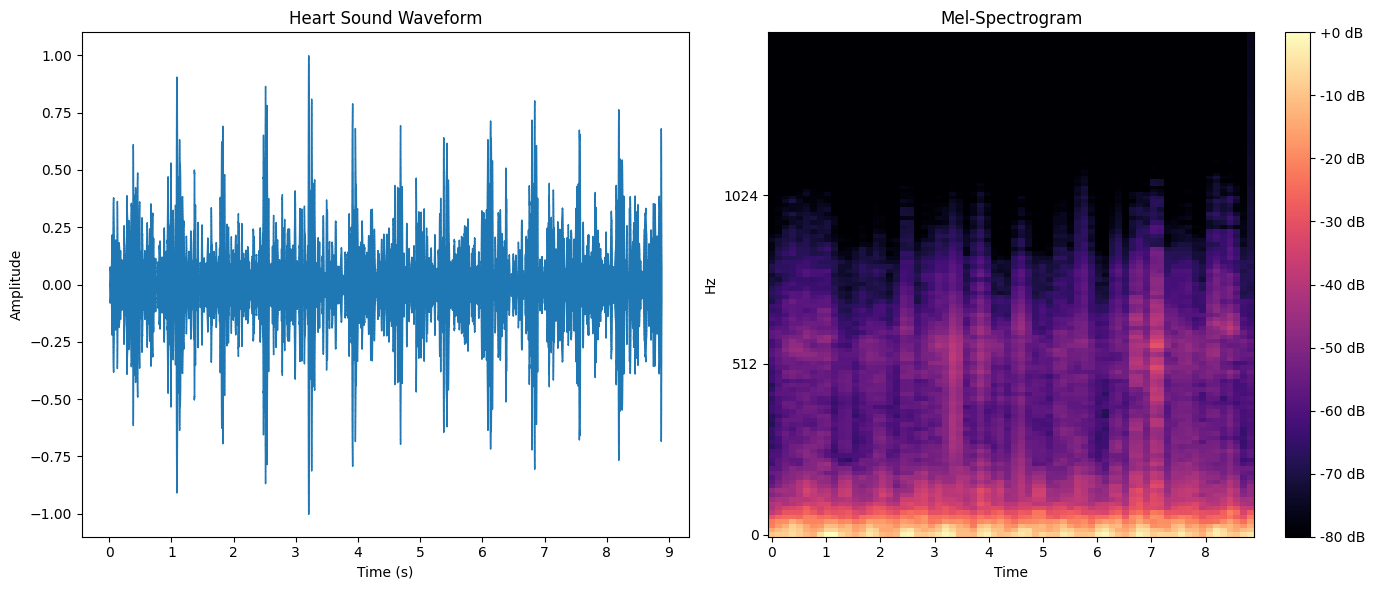

In [156]:
def visualize_audio(file_path, sr=SR, n_mels=N_MELS, duration=DURATION):
    # Load audio
    y, sr = librosa.load(file_path, sr=sr, duration=duration)

    # Create Mel-spectrogram
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    # Plot
    plt.figure(figsize=(14, 6))

    # Waveform
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title("Heart Sound Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Mel-spectrogram
    plt.subplot(1, 2, 2)
    librosa.display.specshow(
        mel_db,
        sr=sr,
        x_axis='time',
        y_axis='mel',
        cmap='magma'
    )
    plt.colorbar(format='%+2.0f dB')
    plt.title("Mel-Spectrogram")

    plt.tight_layout()
    plt.show()

    # Play audio
    return ipd.Audio(y, rate=sr)

# Example usage (pick any WAV file)
sample_file = merged.iloc[0]['filepath']
visualize_audio(sample_file)



Class: AR | Samples: 2



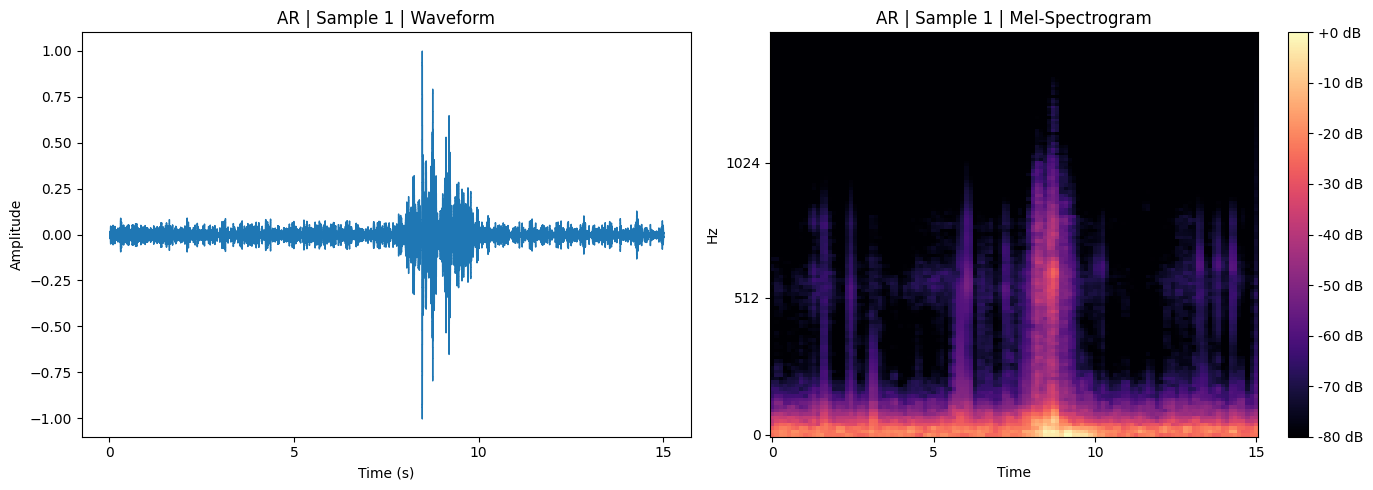

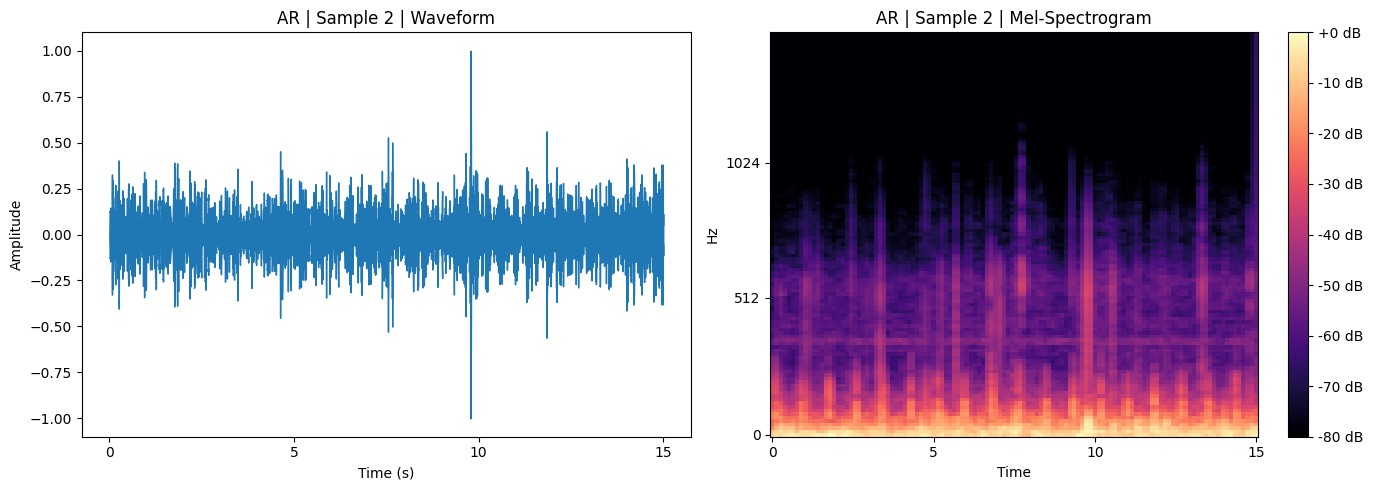



Class: MR | Samples: 2



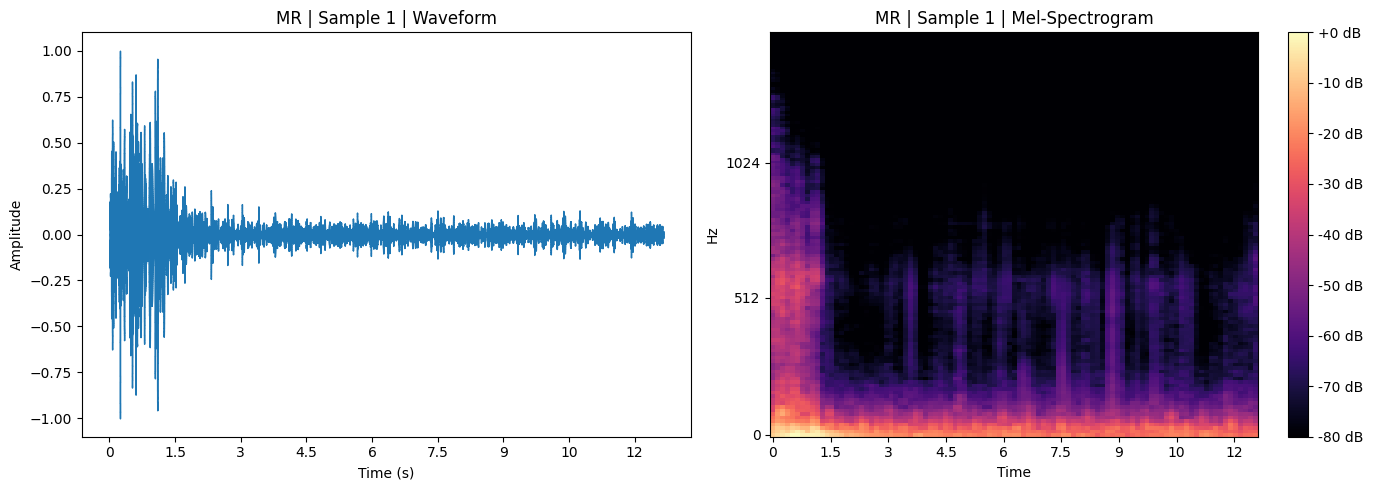

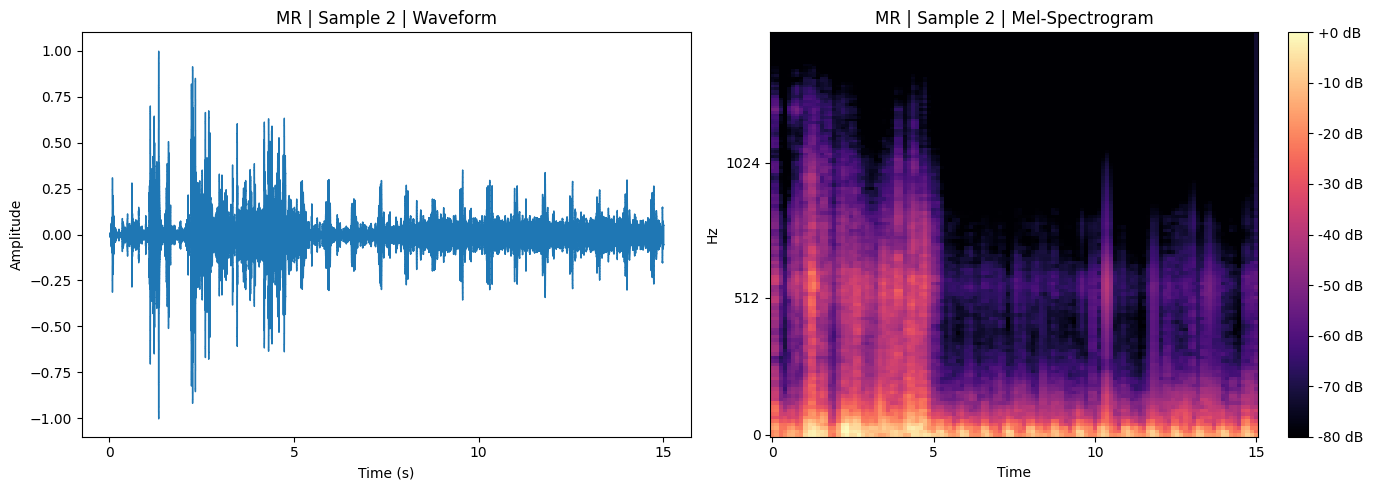



Class: TR | Samples: 2



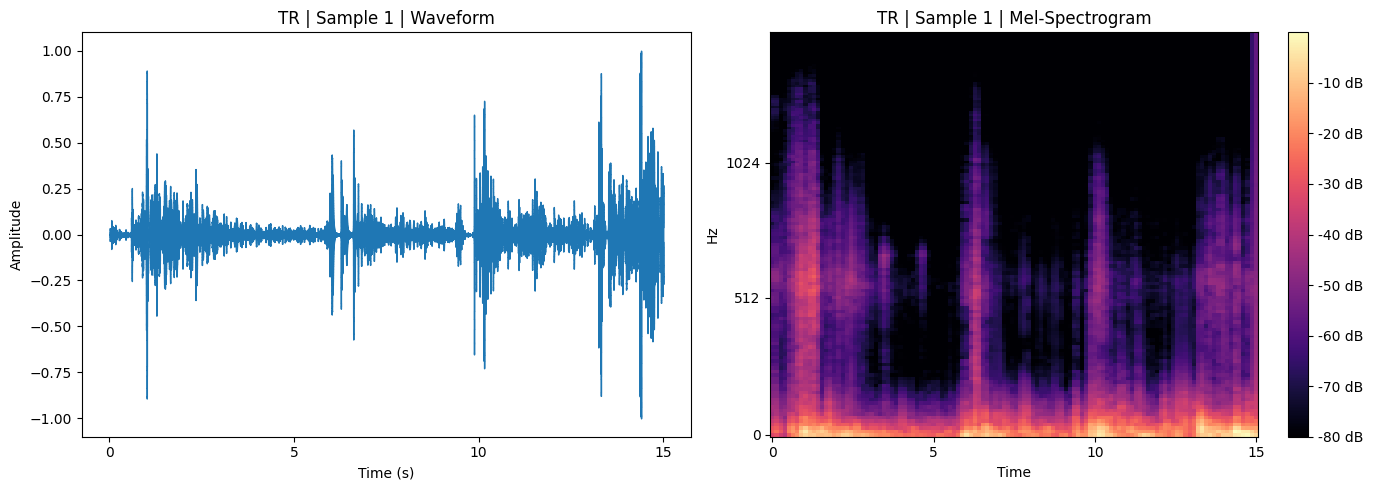

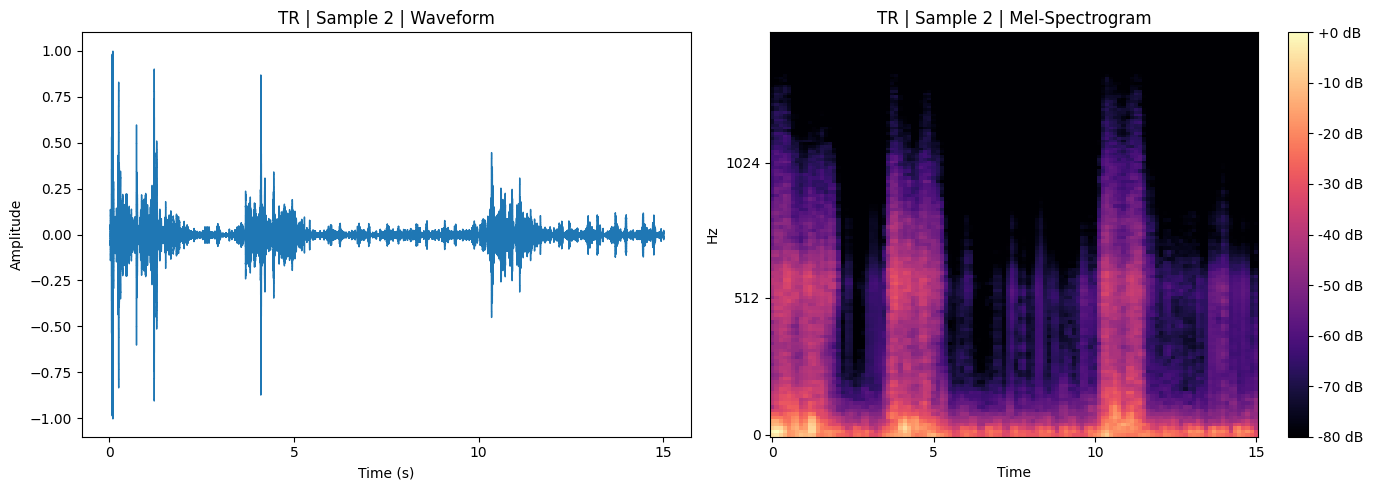

No samples found for class AS
No samples found for class MS
No samples found for class PS


Class: N | Samples: 2



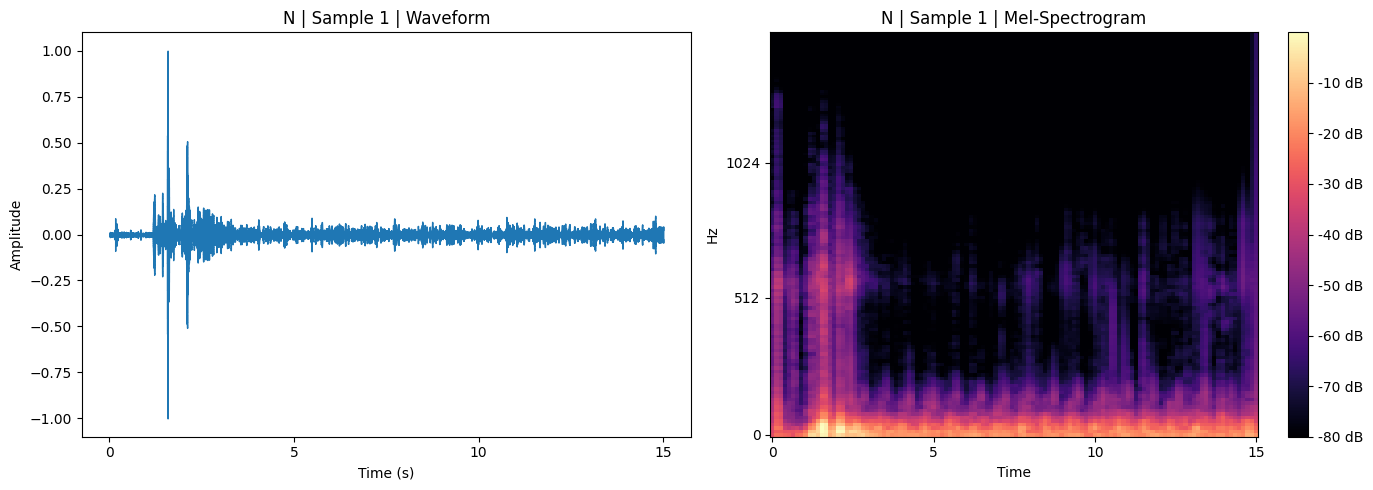

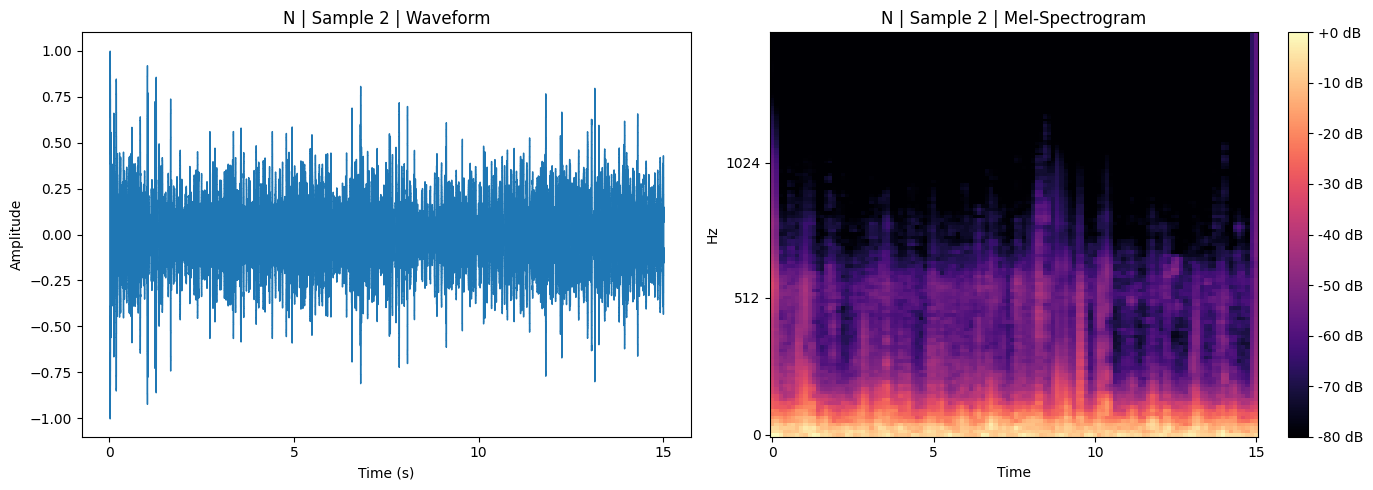

In [157]:
# ==========================================
# Batch Visualization per Class
# ==========================================

def visualize_batch_per_class(
    merged_df,
    classes,
    samples_per_class=2,
    sr=SR,
    n_mels=N_MELS,
    duration=DURATION
):
    

    for cls in classes:
        class_df = merged_df[merged_df['label'] == cls]

        if len(class_df) == 0:
            print(f"No samples found for class {cls}")
            continue

        print(f"\n")
        print(f"Class: {cls} | Samples: {min(samples_per_class, len(class_df))}")
        print(f"")

        sample_rows = class_df.sample(
            n=min(samples_per_class, len(class_df)),
            random_state=RANDOM_STATE
        )

        for i, (_, row) in enumerate(sample_rows.iterrows(), 1):
            file_path = row['filepath']

            try:
                y, sr = librosa.load(file_path, sr=sr, duration=duration)
            except Exception as e:
                print("Error loading:", file_path, e)
                continue

            mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
            mel_db = librosa.power_to_db(mel, ref=np.max)

            plt.figure(figsize=(14, 5))

            # Waveform
            plt.subplot(1, 2, 1)
            librosa.display.waveshow(y, sr=sr)
            plt.title(f"{cls} | Sample {i} | Waveform")
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")

            # Mel-spectrogram
            plt.subplot(1, 2, 2)
            librosa.display.specshow(
                mel_db,
                sr=sr,
                x_axis='time',
                y_axis='mel',
                cmap='magma'
            )
            plt.colorbar(format='%+2.0f dB')
            plt.title(f"{cls} | Sample {i} | Mel-Spectrogram")

            plt.tight_layout()
            plt.show()

            # Play audio
            display(ipd.Audio(y, rate=sr))


# Classes to visualize (same as training)
CLASSES_TO_VISUALIZE = MURMUR_CLASSES + ['N']

# Run visualization
visualize_batch_per_class(
    merged_df=merged,
    classes=CLASSES_TO_VISUALIZE,
    samples_per_class=2   # change to 3–5 if needed
)


In [158]:
# Filter classes with too few samples and prepare arrays for models
vc = pd.Series(y).value_counts()
valid = vc[vc >= MIN_SAMPLES_PER_CLASS].index.tolist()
print("Keeping classes with >=", MIN_SAMPLES_PER_CLASS, "samples:", valid)
mask = np.isin(y, valid)
X = X[mask]
y = y[mask]
paths = [p for i,p in enumerate(paths) if mask[i]]
print("After filtering:", X.shape, pd.Series(y).value_counts().to_dict())

# For CNN/CRNN we need data shape (n_samples, n_mels, time, 1)
X_cnn = X[..., np.newaxis]

# encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)
num_classes = len(le.classes_)
print("Encoded classes:", le.classes_)


Keeping classes with >= 3 samples: ['N', 'TR', 'MR', 'AR']
After filtering: (400, 128, 118) {'N': 233, 'TR': 83, 'MR': 67, 'AR': 17}
Encoded classes: ['AR' 'MR' 'N' 'TR']


In [159]:
# train/test split (same split for both models)
X_train, X_test, y_train, y_test, paths_train, paths_test = train_test_split(
    X_cnn, y_enc, paths, test_size=0.2, stratify=y_enc, random_state=RANDOM_STATE
)
print("Train samples:", len(X_train), "Test samples:", len(X_test))


Train samples: 320 Test samples: 80


In [160]:
def attention_block(inputs):
    score = layers.Dense(128, activation='tanh')(inputs)
    score = layers.Dense(1)(score)
    weights = layers.Softmax(axis=1)(score)
    context = tf.reduce_sum(weights * inputs, axis=1)
    return context


# Residual CNN Block
def residual_conv_block(x, filters):
    shortcut = x

    x = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Match channel dimensions
    if shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, (1,1), padding='same')(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.25)(x)
    return x

# Improved CRNN Model
def build_improved_crnn(input_shape, num_classes):
    inp = layers.Input(shape=input_shape)

    # CNN Front-End (Residual)
    x = residual_conv_block(inp, 32)
    x = residual_conv_block(x, 64)
    x = residual_conv_block(x, 128)

    # Reshape for RNN
    # (batch, freq, time, channels) → (batch, time, features)
    shape = x.shape
    x = layers.Reshape((shape[2], int(shape[1] * shape[3])))(x)

    # Temporal Modeling
    x = layers.Bidirectional(
        layers.LSTM(128, return_sequences=True)
    )(x)
    x = layers.Bidirectional(
        layers.LSTM(64, return_sequences=True)
    )(x)

    # Attention
    x = attention_block(x)

    # Classification Head
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    out = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inp, out)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model



In [161]:
input_shape = X_train.shape[1:]  # (n_mels, time, 1)
crnn = build_improved_crnn(input_shape, num_classes)
crnn.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 118, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_18 (Conv2D)             (None, 128, 118, 32  320         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_16 (BatchN  (None, 128, 118, 32  128        ['conv2d_18[0][0]']              
 ormalization)                  )                                                           

 tf.math.multiply_4 (TFOpLambda  (None, 14, 128)     0           ['softmax_1[0][0]',              
 )                                                                'bidirectional_6[0][0]']        
                                                                                                  
 tf.math.reduce_sum_4 (TFOpLamb  (None, 128)         0           ['tf.math.multiply_4[0][0]']     
 da)                                                                                              
                                                                                                  
 dense_18 (Dense)               (None, 256)          33024       ['tf.math.reduce_sum_4[0][0]']   
                                                                                                  
 batch_normalization_22 (BatchN  (None, 256)         1024        ['dense_18[0][0]']               
 ormalization)                                                                                    
          

In [162]:
ck2 = callbacks.ModelCheckpoint("best_crnn.h5", save_best_only=True, monitor='val_accuracy')
es2 = callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

history = crnn.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=BATCH_SIZE,
    callbacks=[ck2, es2],
    class_weight=class_weights,
    verbose=1
)


Epoch 1/100
16/16 [==============================] - 161s 3s/step - loss: 1.7059 - accuracy: 0.2891 - val_loss: 1.4210 - val_accuracy: 0.0312
Epoch 2/100
16/16 [==============================] - 37s 2s/step - loss: 1.8454 - accuracy: 0.2461 - val_loss: 1.4902 - val_accuracy: 0.0312
Epoch 3/100
16/16 [==============================] - 40s 3s/step - loss: 1.5370 - accuracy: 0.3125 - val_loss: 1.5519 - val_accuracy: 0.0312
Epoch 4/100
16/16 [==============================] - 40s 3s/step - loss: 1.7036 - accuracy: 0.2852 - val_loss: 1.6224 - val_accuracy: 0.0312
Epoch 5/100
16/16 [==============================] - 42s 3s/step - loss: 1.6788 - accuracy: 0.2617 - val_loss: 1.6766 - val_accuracy: 0.0312
Epoch 6/100
16/16 [==============================] - 41s 3s/step - loss: 1.6185 - accuracy: 0.3125 - val_loss: 1.7315 - val_accuracy: 0.0312
Epoch 7/100
16/16 [==============================] - 37s 2s/step - loss: 1.7302 - accuracy: 0.2344 - val_loss: 1.8188 - val_accuracy: 0.0312
Epoch 8/100


Epoch 59/100
16/16 [==============================] - 34s 2s/step - loss: 0.9497 - accuracy: 0.4922 - val_loss: 3.7878 - val_accuracy: 0.1562
Epoch 60/100
16/16 [==============================] - 42s 3s/step - loss: 0.8749 - accuracy: 0.5117 - val_loss: 3.4598 - val_accuracy: 0.1875
Epoch 61/100
16/16 [==============================] - 40s 2s/step - loss: 0.8597 - accuracy: 0.5195 - val_loss: 3.4088 - val_accuracy: 0.1875
Epoch 62/100
16/16 [==============================] - 43s 3s/step - loss: 0.8413 - accuracy: 0.5078 - val_loss: 2.9747 - val_accuracy: 0.2188
Epoch 63/100
16/16 [==============================] - 40s 3s/step - loss: 0.8462 - accuracy: 0.5195 - val_loss: 3.3390 - val_accuracy: 0.1875
Epoch 64/100
16/16 [==============================] - 39s 2s/step - loss: 0.8584 - accuracy: 0.5117 - val_loss: 2.9851 - val_accuracy: 0.1719
Epoch 65/100
16/16 [==============================] - 40s 3s/step - loss: 0.8649 - accuracy: 0.5195 - val_loss: 2.7471 - val_accuracy: 0.2344
Epoch 

In [163]:
# Evaluate on test set and compare
def evaluate_model(m, Xt, yt, le):
    loss, acc = m.evaluate(Xt, yt, verbose=0)
    y_pred = np.argmax(m.predict(Xt), axis=1)
    print(f"Test loss: {loss:.4f}, Test acc: {acc:.4f}")
    print(classification_report(yt, y_pred, target_names=le.classes_))
    cm = confusion_matrix(yt, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix')
    plt.show()
    return acc


CRNN evaluation:
3/3 [==============================] - 13s 776ms/step
Test loss: 2.9907, Test acc: 0.3500
              precision    recall  f1-score   support

          AR       0.08      0.33      0.12         3
          MR       0.33      0.15      0.21        13
           N       0.54      0.43      0.48        47
          TR       0.21      0.29      0.24        17

    accuracy                           0.35        80
   macro avg       0.29      0.30      0.26        80
weighted avg       0.42      0.35      0.37        80



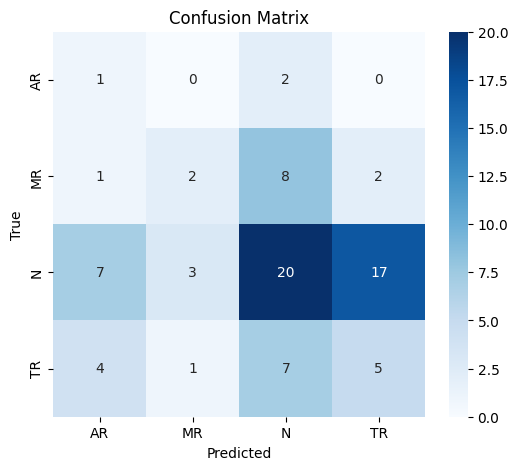

In [164]:
print("CRNN evaluation:")
acc_crnn = evaluate_model(crnn, X_test, y_test, le)

CRNN history:


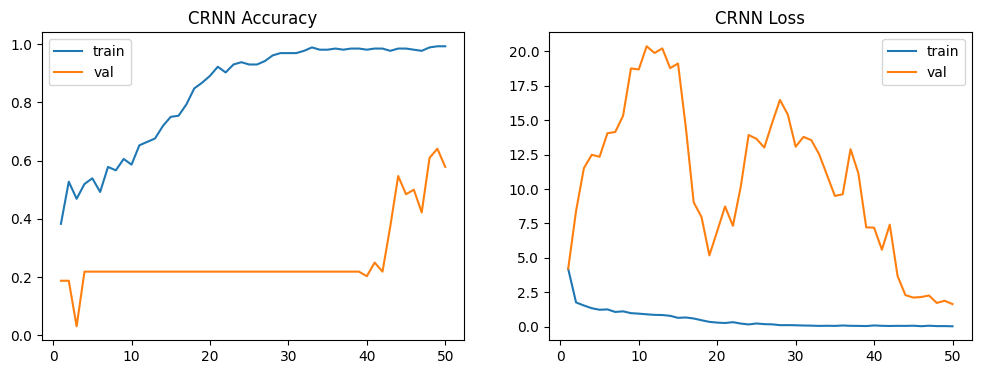

In [165]:
# Plot training curves for the best model
def plot_history(history, title_prefix="Model"):
    acc = history.history.get('accuracy', history.history.get('acc'))
    val_acc = history.history.get('val_accuracy', history.history.get('val_acc'))
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc)+1)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, label='train')
    plt.plot(epochs, val_acc, label='val')
    plt.title(f'{title_prefix} Accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, loss, label='train')
    plt.plot(epochs, val_loss, label='val')
    plt.title(f'{title_prefix} Loss')
    plt.legend()
    plt.show()


print("CRNN history:")
plot_history(history_crnn, "CRNN")


Loading: C:\Users\yyy\5442\ENV\Scripts\AAAMyProject\N\E_H_19_A.wav


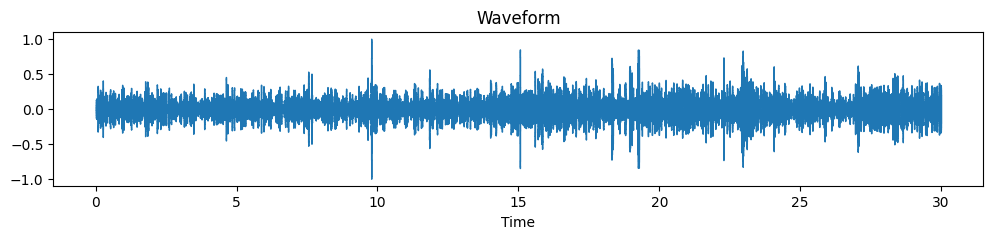

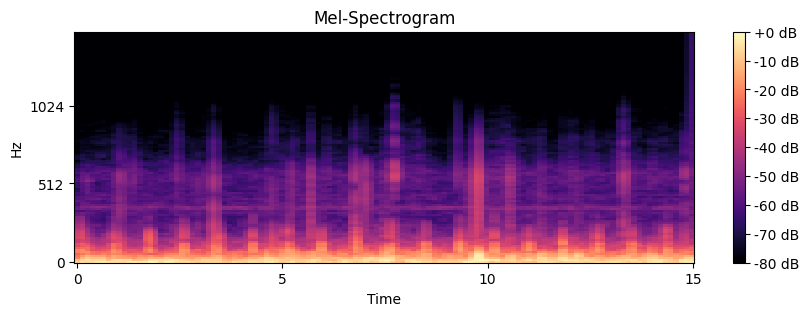

Mean dB: -64.873085
1/1 [==============================] - 0s 61ms/step
Predicted: AR (confidence 1.000)
Top-3:
  AR: 1.000
  TR: 0.000
  N: 0.000


('AR',
 array([9.9972528e-01, 5.0103972e-07, 2.6189191e-06, 2.7158897e-04],
       dtype=float32))

In [166]:
# Prediction helper (play audio, show waveform/spectrogram, predict)
def predict_file(file_path, model=crnn, label_encoder=le, sr=SR, duration=DURATION, n_mels=N_MELS):
    file_path = str(file_path)
    print("Loading:", file_path)
    try:
        y, _ = librosa.load(file_path, sr=sr)
    except Exception as e:
        print("Error loading audio:", e); return
    # play audio
    display(ipd.Audio(y, rate=sr))
    # waveform
    plt.figure(figsize=(12,2))
    librosa.display.waveshow(y, sr=sr)
    plt.title("Waveform")
    plt.show()
    # prepare mel
    target_len = sr * duration
    if len(y) < target_len:
        y = np.pad(y, (0, target_len - len(y)))
    else:
        y = y[:target_len]
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    mel_norm = (mel_db - mel_db.min())/(mel_db.max()-mel_db.min()+1e-9)
    # show spectrogram
    plt.figure(figsize=(10,3))
    librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
    plt.colorbar(format='%+2.0f dB'); plt.title("Mel-Spectrogram"); plt.show()
    # energy check (mean dB)
    mean_db = np.mean(mel_db)
    print("Mean dB:", mean_db)
    # prepare input for model (shape)
    x_in = mel_norm[np.newaxis, ..., np.newaxis]  # (1, n_mels, time, 1)
    probs = model.predict(x_in)[0]
    idx = np.argmax(probs)
    label = label_encoder.inverse_transform([idx])[0]
    print(f"Predicted: {label} (confidence {probs[idx]:.3f})")
    # show top3
    top3 = np.argsort(probs)[-3:][::-1]
    print("Top-3:")
    for i in top3:
        print(f"  {label_encoder.classes_[i]}: {probs[i]:.3f}")
    return label, probs


predict_file(r"C:\Users\yyy\5442\ENV\Scripts\AAAMyProject\N\E_H_19_A.wav")


In [168]:
# I took this block of code from Chatgpt...

import tempfile
import ipywidgets as widgets
from IPython.display import display, clear_output
from pathlib import Path

upload_widget = widgets.FileUpload(
    accept='.wav,.mp3,.flac,.ogg,.m4a',
    multiple=False,
    description='Upload Heart Sound'
)

predict_button = widgets.Button(
    description='Predict Heart Valve Disorder',
    button_style='success'
)

output = widgets.Output()

def _extract_upload_item(uploader_value):
    """
    Robust extraction across ipywidgets versions.
    Returns (filename, content_bytes)
    """
    if not uploader_value:
        return None, None

    # ipywidgets 8 (tuple)
    if isinstance(uploader_value, (tuple, list)):
        item = uploader_value[0]
        content = item.get('content')
        filename = (
            item.get('name')
            or item.get('filename')
            or "uploaded_audio"
        )
        return filename, content

    # ipywidgets 7 (dict)
    if isinstance(uploader_value, dict):
        key = next(iter(uploader_value))
        item = uploader_value[key]
        content = item.get('content')
        filename = (
            item.get('name')
            or item.get('filename')
            or key
            or "uploaded_audio"
        )
        return filename, content

    return None, None


def on_predict_clicked(_):
    with output:
        clear_output()

        filename, file_bytes = _extract_upload_item(upload_widget.value)
        if file_bytes is None:
            print("Upload failed. Please try again.")
            return

        # Ensure extension exists
        suffix = Path(filename).suffix
        if suffix == "":
            suffix = ".wav"

        # Create a temporary file safely (Windows compatible)
        with tempfile.NamedTemporaryFile(delete=False, suffix=suffix) as tmp:
            tmp.write(file_bytes)
            temp_path = tmp.name

        print(f" Uploaded file: {filename}")
        print(f" Temporary file: {temp_path}")
        print("Running prediction...\n")

        # Run your existing prediction helper
        predict_file(temp_path)

        # Optional: cleanup
        try:
            os.remove(temp_path)
        except Exception:
            pass


predict_button.on_click(on_predict_clicked)

display(upload_widget, predict_button, output)


FileUpload(value=(), accept='.wav,.mp3,.flac,.ogg,.m4a', description='Upload Heart Sound')

Button(button_style='success', description='Predict Heart Valve Disorder', style=ButtonStyle())

Output()